In [218]:
import pandas as pd
from strategy import Strategy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = Strategy.load_dataset()
df = df.rename(columns={
        f"bet365_1X2 Full Time_outcome_{i}_closing_value": f"bet365_{i}" for i in range(1, 4)
})
def cpt_winner(g1, g2):
        if g1 > g2:
            return 1
        elif g1 < g2:
            return 3
        else:
            return 2
df['result'] = df[['score_ft_1', 'score_ft_2']].apply(lambda x: cpt_winner(x[0], x[1]), axis=1)


In [254]:
import os
strategies = os.listdir('strategies')
print(f"NUMBER: {len(strategies)}")
strategies.sort(key=lambda x: - os.path.getmtime(f'strategies/{x}'))
print('\n'.join(strategies))

NUMBER: 25
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__3.json
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__2.json
strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__1.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__3.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__2.json
strategy_3M_H_G_rank_coeff_1__3M_A_GA_rank_coeff_2__1.json
strategy_H_G_rank_1__A_GA_rank_2__3.json
strategy_H_G_rank_1__A_GA_rank_2__2.json
strategy_H_G_rank_1__A_GA_rank_2__1.json
strategy_H_GA_rank_1__A_G_rank_2__3.json
strategy_H_GA_rank_1__A_G_rank_2__2.json
strategy_H_GA_rank_1__A_G_rank_2__1.json
strategy_H_P_rank_1__A_P_rank_2__3.json
strategy_H_P_rank_1__A_P_rank_2__2.json
strategy_H_P_rank_1__A_P_rank_2__1.json
strategy_3M_H_G_rank_1__3M_A_GA_rank_2__3.json
strategy_3M_P_rank_1__3M_P_rank_2__1.json
strategy_3M_H_G_rank_1__3M_A_GA_rank_2__2.json
strategy_3M_H_G_rank_1__3M_A_GA_rank_2__1.json
strategy_3M_H_GA_rank_1__3M_A_G_rank_2__3.json
strategy_3M_H_GA_rank_1__3M_A_G_rank_2__2.

In [255]:
for s in strategies:
    strategy = Strategy.load_strategy_from_file(f'strategies/{s}')
    matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
    print(s)
    print(strategy)
    result = strategy.get('result')
    matches = matches.reset_index()
    print(f'Number of matches: {len(matches)}')
    print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
    print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
    print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
    print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
    print(f"Average odd: {matches[f'bet365_{result}'].mean()}")
    print()
    print()

strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__3.json
{'3M_H_P_rank_coeff_1': [22, 27], '3M_A_P_rank_coeff_2': [2, 24], 'result': 3, 'bet365_3': [2.7300000000000004, 6.13]}
Number of matches: 860
Total revenue (with 1 euro bets): 94.02999999999999
ROI: 10.933720930232557%
Winning bets: 269 / 860
Winning rate: 31.279069767441857 %
Average odd: 3.682395348837209


strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__2.json
{'3M_H_P_rank_coeff_1': [19, 23], '3M_A_P_rank_coeff_2': [4, 6], 'result': 2, 'bet365_2': [1.2400000000000002, 7.840000000000001]}
Number of matches: 961
Total revenue (with 1 euro bets): 99.14999999999999
ROI: 10.317377731529657%
Winning bets: 311 / 961
Winning rate: 32.3621227887617 %
Average odd: 3.4635275754422477


strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__1.json
{'3M_H_P_rank_coeff_1': [2, 12], '3M_A_P_rank_coeff_2': [14, 21], 'result': 1, 'bet365_1': [3.24, 7.23]}
Number of matches: 737
Total revenue (with 1 euro bets): 130.18
ROI: 17.663500678426054%

In [256]:
STRATEGY = 'strategy_3M_H_P_rank_coeff_1__3M_A_P_rank_coeff_2__3.json'

In [257]:
strategy = Strategy.load_strategy_from_file(f'strategies/{STRATEGY}')
strategy

{'3M_H_P_rank_coeff_1': [22, 27],
 '3M_A_P_rank_coeff_2': [2, 24],
 'result': 3,
 'bet365_3': [2.7300000000000004, 6.13]}

In [258]:
matches, gain_by_year = Strategy.analyze_strategy(strategy, df)
result = strategy.get('result')
matches = matches.reset_index()
print(f'Number of matches: {len(matches)}')
print(f'Total revenue (with 1 euro bets): {matches.gain.sum()}')
print(f'ROI: {matches.gain.sum() / len(matches) * 100}%')
print(f'Winning bets: {len(matches[matches.result == result])} / {len(matches)}')
print(f'Winning rate: {len(matches[matches.result == result]) / len(matches) * 100} %')
print(f"Average odd: {matches[f'bet365_{result}'].mean()}")
print()

Number of matches: 860
Total revenue (with 1 euro bets): 94.02999999999999
ROI: 10.933720930232557%
Winning bets: 269 / 860
Winning rate: 31.279069767441857 %
Average odd: 3.682395348837209



In [259]:
print('Odds distribution')
print(matches[f'bet365_{result}'].value_counts())

Odds distribution
3.10    61
3.00    58
4.00    53
3.60    53
3.20    46
2.80    44
3.50    43
3.80    39
3.75    38
4.50    37
3.30    37
4.33    37
3.40    34
2.90    32
4.75    29
5.00    28
4.20    28
2.88    25
3.25    24
2.75    24
5.25    17
5.50    13
5.75    12
2.87    10
6.00     9
3.90     7
3.70     5
2.89     4
3.39     3
4.10     3
2.79     2
5.40     1
3.89     1
4.60     1
4.80     1
4.25     1
Name: bet365_3, dtype: int64


<AxesSubplot:>

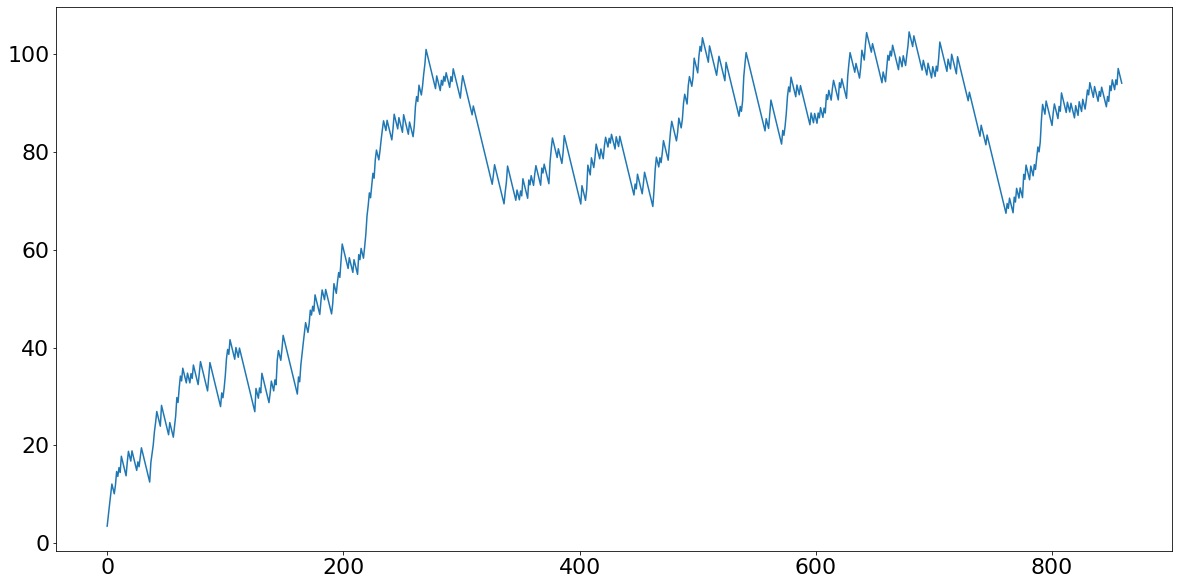

In [260]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]
matplotlib.rcParams.update({'font.size': 22})

matches.cum_gain.plot()

<AxesSubplot:xlabel='year'>

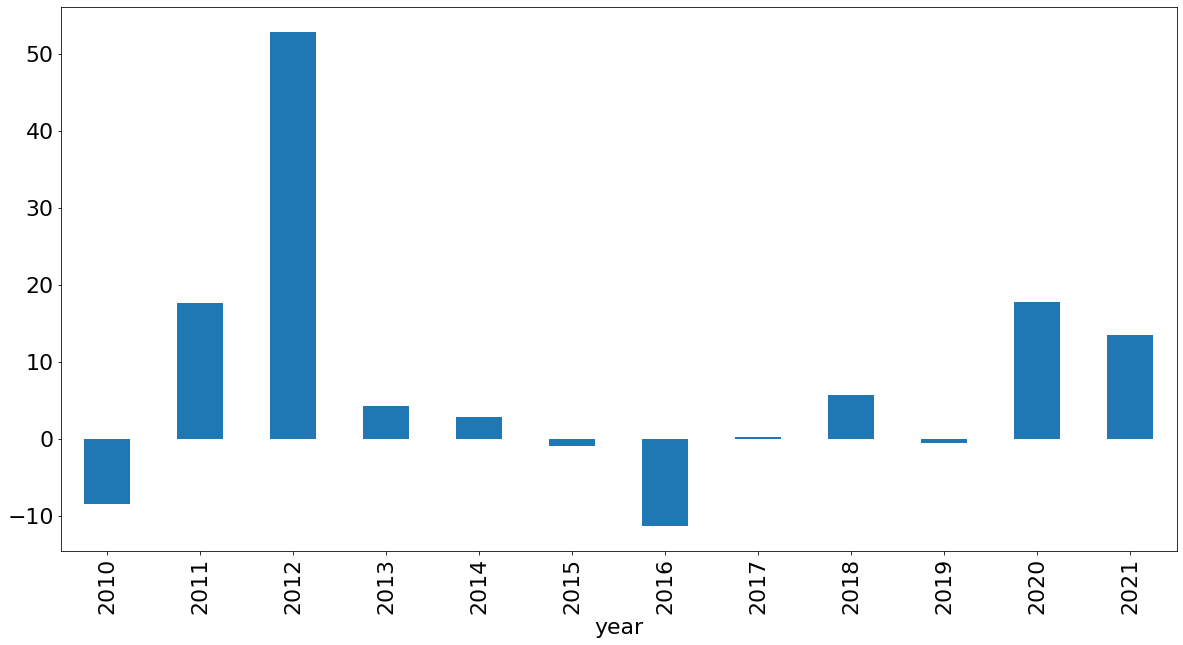

In [261]:
gain_by_year.plot.bar()

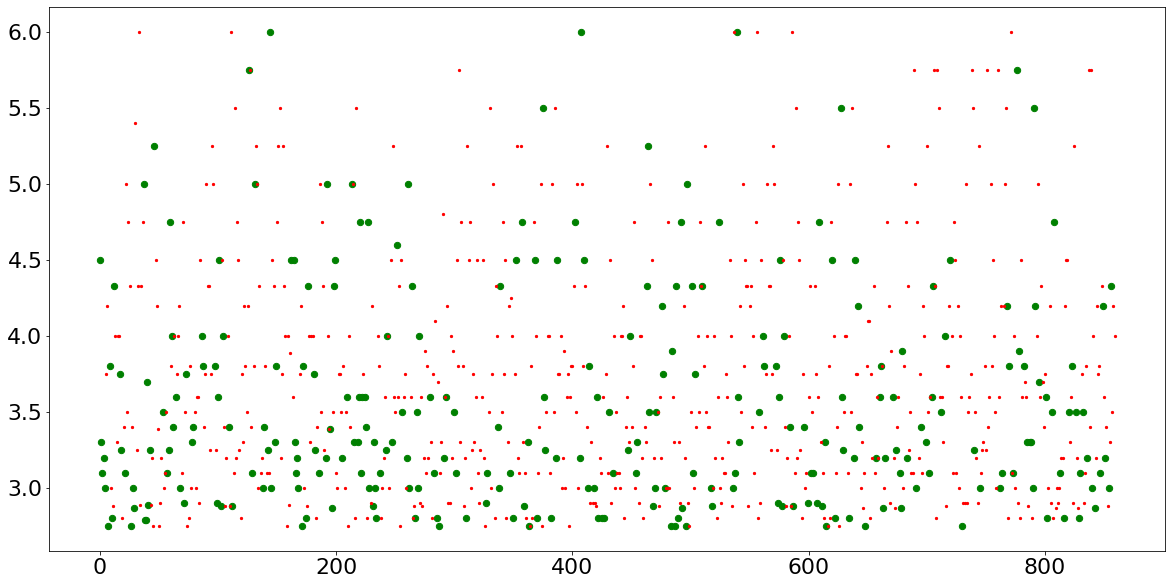

In [262]:
plt.scatter(x = matches[matches.gain > 0].index, y=matches[matches.gain > 0][f"bet365_{strategy.get('result')}"], s=40, color='green')
plt.scatter(x = matches[matches.gain < 0].index, y=matches[matches.gain < 0][f"bet365_{strategy.get('result')}"], color='red', s=5)

<AxesSubplot:xlabel='country'>

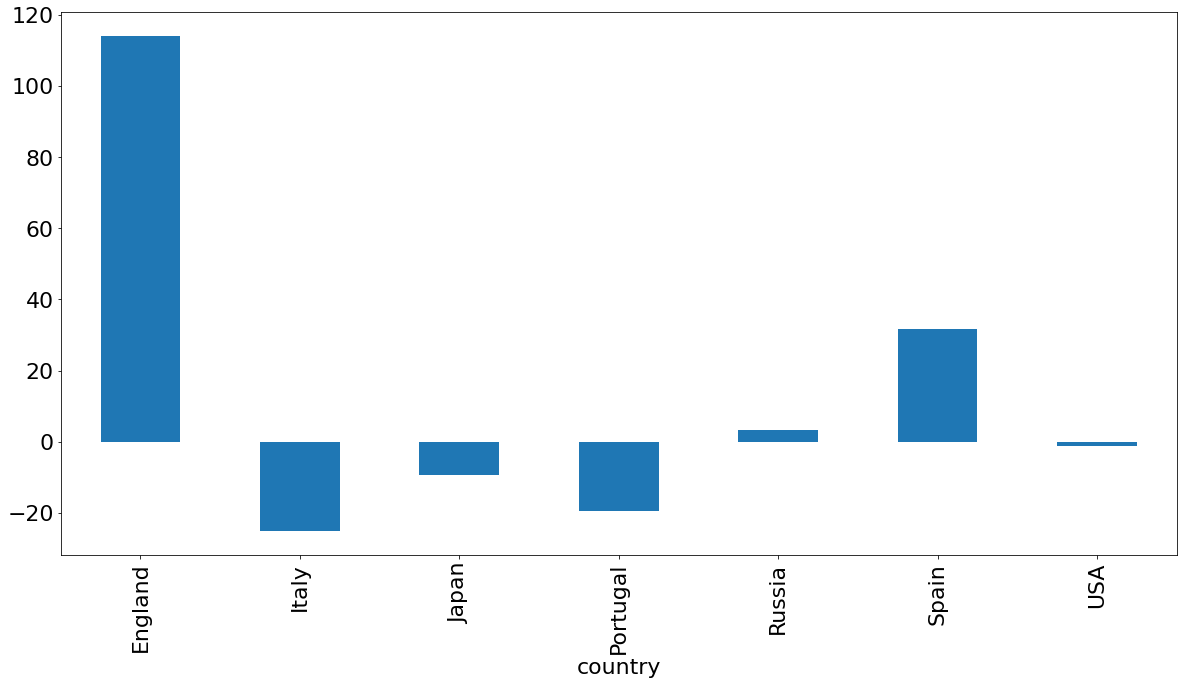

In [263]:
gain_by_country = matches.groupby(by='country')["gain"]
gain_by_country.sum().plot.bar()

<AxesSubplot:xlabel='league'>

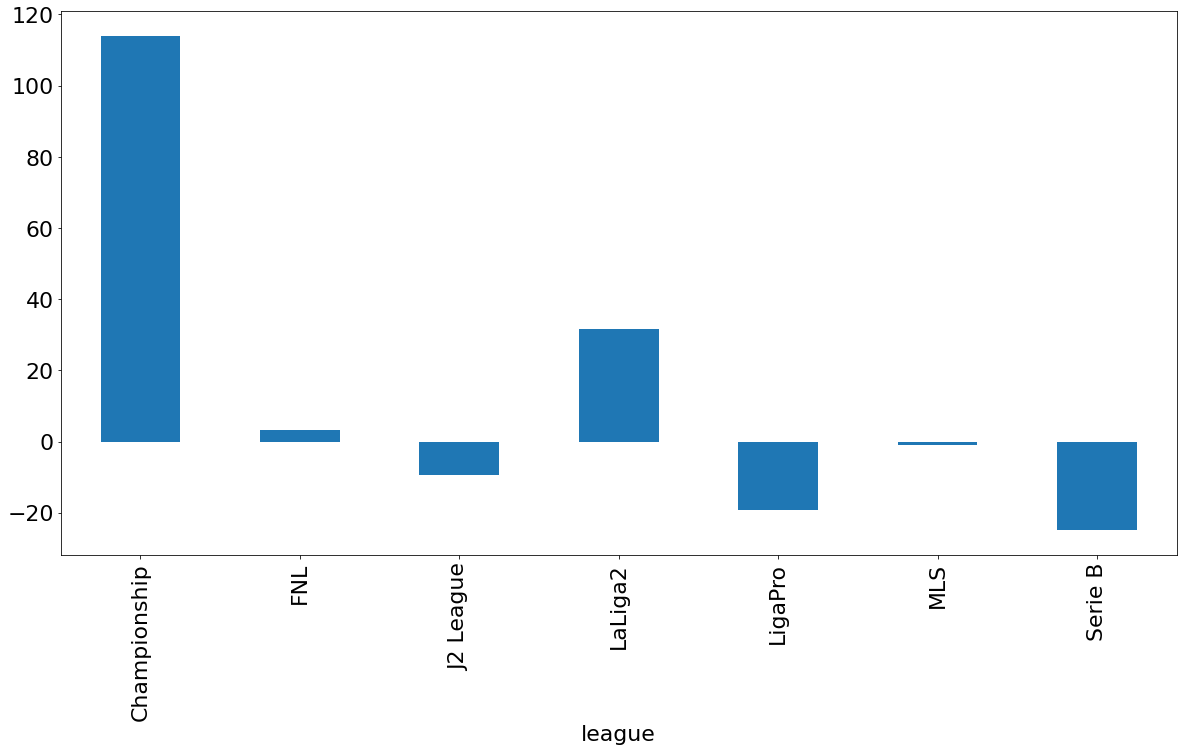

In [264]:
gain_by_league = matches.groupby(by='league')["gain"].sum()
gain_by_league.plot.bar()